
### The dataset that are being used for the project

1. Parkinsons – sumber : https://archive.ics.uci.edu/dataset/174/parkinsons

### Dataset Description: 
1. Deskripsi Umum
Dataset ini berisi data suara yang diambil dari individu yang didiagnosis dengan penyakit Parkinson dan individu sehat. Tujuan utama dari dataset ini adalah untuk membantu dalam pengembangan algoritma yang dapat mendeteksi penyakit Parkinson berdasarkan analisis suara.

2. Sumber Data
Dataset ini diambil dari penelitian yang dilakukan oleh Dr. Max Little dan timnya, yang berfokus pada analisis suara untuk mendeteksi Parkinson. Data dikumpulkan dari 31 subjek, di mana 23 di antaranya didiagnosis dengan Parkinson dan 8 lainnya adalah kontrol sehat.

3. Fitur Dataset
Dataset ini terdiri dari 23 fitur yang diukur dari rekaman suara. Fitur-fitur ini mencakup berbagai aspek dari sinyal suara, yang dapat memberikan informasi penting tentang kondisi kesehatan individu. Berikut adalah beberapa fitur yang terdapat dalam dataset:

- MDVP:Fo(Hz): Frekuensi fundamental rata-rata.
- MDVP:Fhi(Hz): Frekuensi tertinggi.
- MDVP:Flo(Hz): Frekuensi terendah.
- MDVP:Jitter(%): Variasi frekuensi (jitter) dalam suara.
- MDVP:Jitter(Abs): Jitter absolut.
- MDVP:RAP: Jitter relatif.
- MDVP:PPQ: Jitter per 11 milidetik.
- MDVP:DDP: Jitter per 11 milidetik.
- MDVP:Shimmer: Variasi amplitudo (shimmer).
- MDVP:Shimmer(dB): Shimmer dalam desibel.
- MDVP:APQ: Shimmer per 11 milidetik.
- NHR: Rasio noise-to-harmonic.
- HNR: Rasio harmonik-to-noise.
- status: Kelas target, di mana 1 menunjukkan individu dengan Parkinson dan 0 menunjukkan individu sehat.

4. Format Data
Dataset ini disajikan dalam format CSV (Comma-Separated Values), yang memudahkan untuk diimpor ke dalam berbagai alat analisis data dan perangkat lunak pembelajaran mesin. Setiap baris dalam dataset mewakili satu pengukuran dari seorang subjek, dengan kolom yang menunjukkan fitur-fitur yang diukur.

5. Ukuran Dataset
Dataset ini terdiri dari 195 entri, di mana setiap entri berisi nilai untuk 23 fitur. Ini memberikan cukup banyak data untuk analisis, meskipun jumlah subjek yang relatif kecil dapat menjadi tantangan dalam hal generalisasi model.
### Project Showcase

### Import Libraries

In [63]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from pyswarm import pso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

import warnings

# Visualization settings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.style.use('ggplot')

# <div align="center"> Exploratory Data Analysis (EDA) </div>

In [2]:
# Load Parkinson dataset
df = pd.read_csv('../dataset/parkinsons.data')

In [6]:
# Show shape of the dataset
print(df.shape)

(195, 24)


In [12]:
# Show basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [13]:
# Show statistical summary of the dataset
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [14]:
# Show class labels from the dataset
df['status'].unique()

array([1, 0])

In [15]:
# Show null values in the dataset (if any)
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [16]:
# Show the value of the intances in the dataset
print("Feature names: \n{}" . format(df.drop(columns=['status'])))
print("Target name: \n{}" . format(df['status']))

Feature names: 
               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  


Class Distribution (Parkinson's vs Normal):
status
1    147
0     48
Name: count, dtype: int64


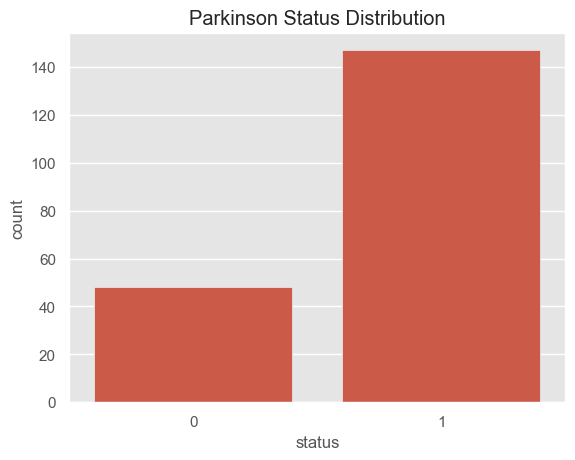

In [17]:
# Check the distribution of the target variable
print("\nClass Distribution (Parkinson's vs Normal):")
print(df['status'].value_counts())

# Show the distribution of the target variable
sns.countplot(x='status', data=df)
plt.title('Parkinson Status Distribution')
plt.show()

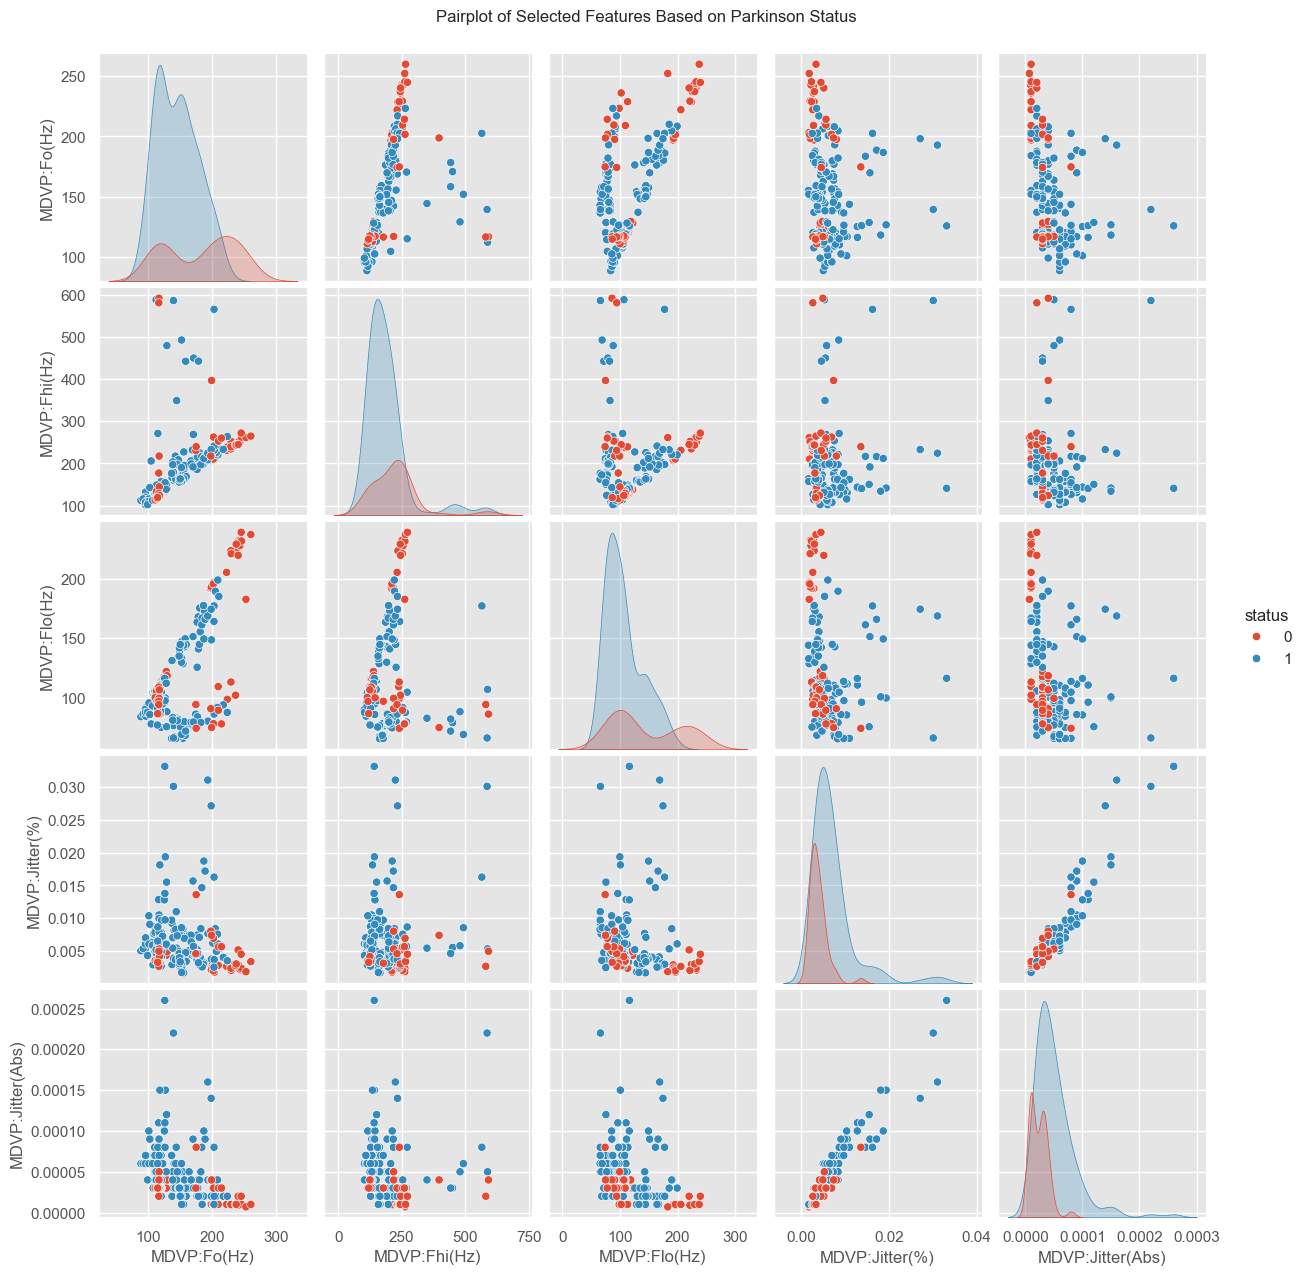

In [18]:
# Pairplot for visualization of the distribution of numerical variables based on the target class
sns.pairplot(df, hue='status', vars=df.columns[1:6])  # Only few features are selected for visualization
plt.suptitle('Pairplot of Selected Features Based on Parkinson Status', y=1.02)
plt.show()

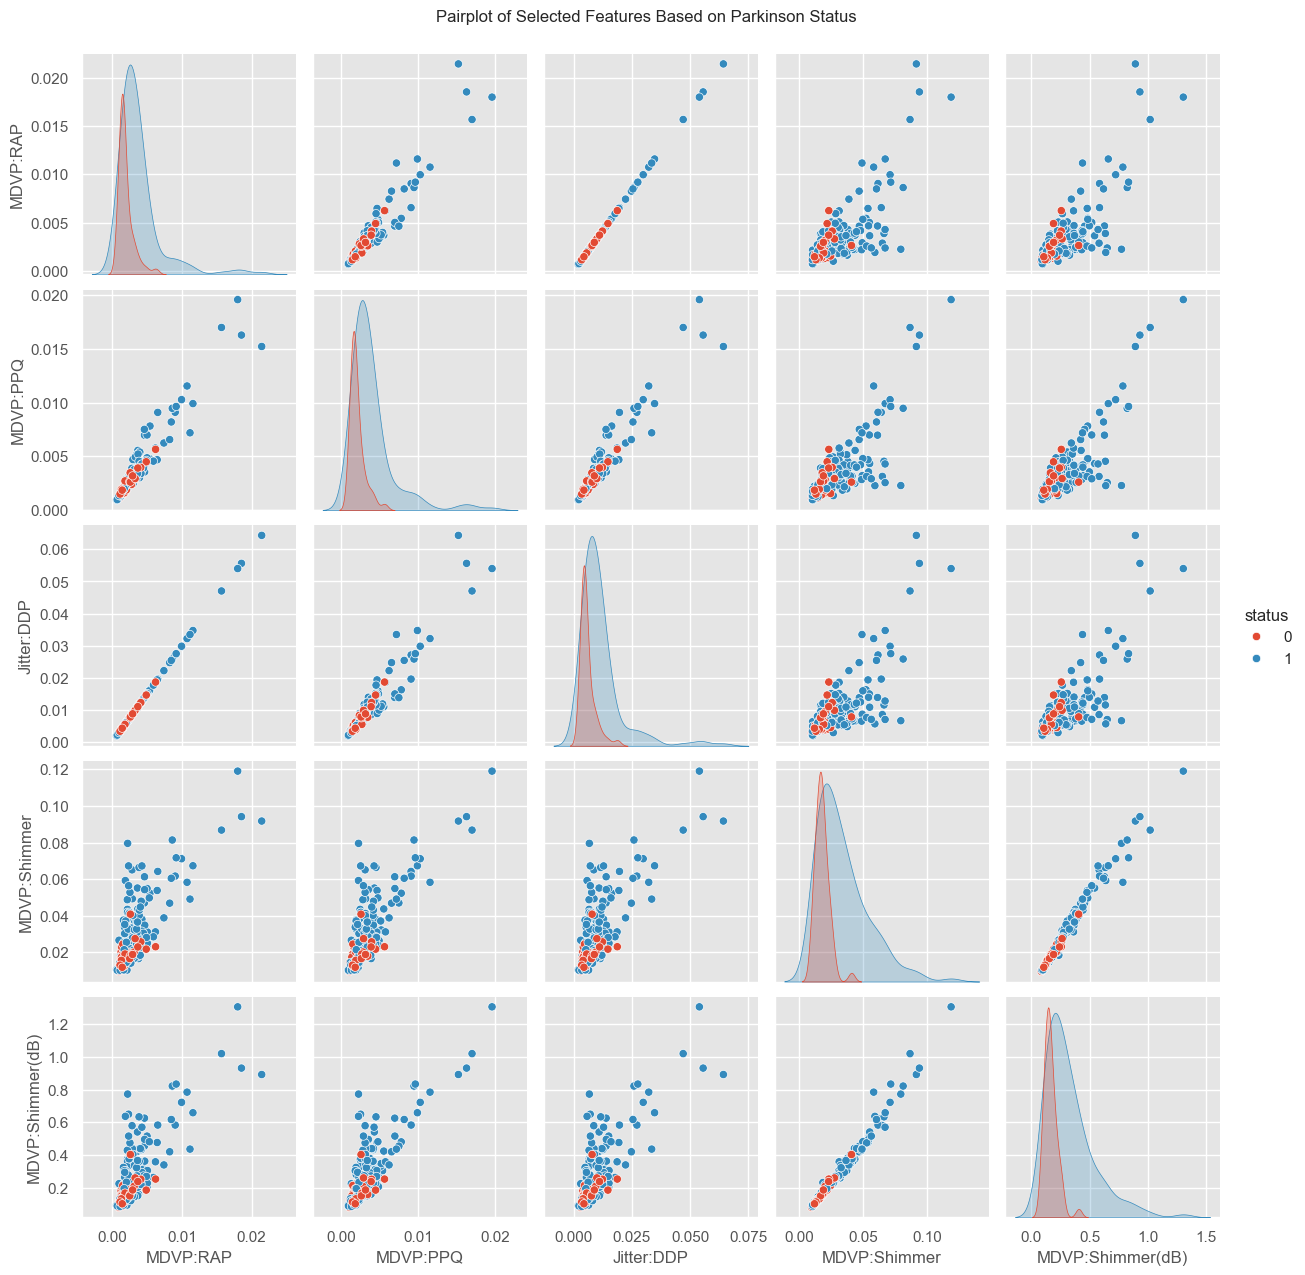

In [19]:
# Pairplot for visualization of the distribution of numerical variables based on the target class
sns.pairplot(df, hue='status', vars=df.columns[6:11])  # Only few features are selected for visualization
plt.suptitle('Pairplot of Selected Features Based on Parkinson Status', y=1.02)
plt.show()

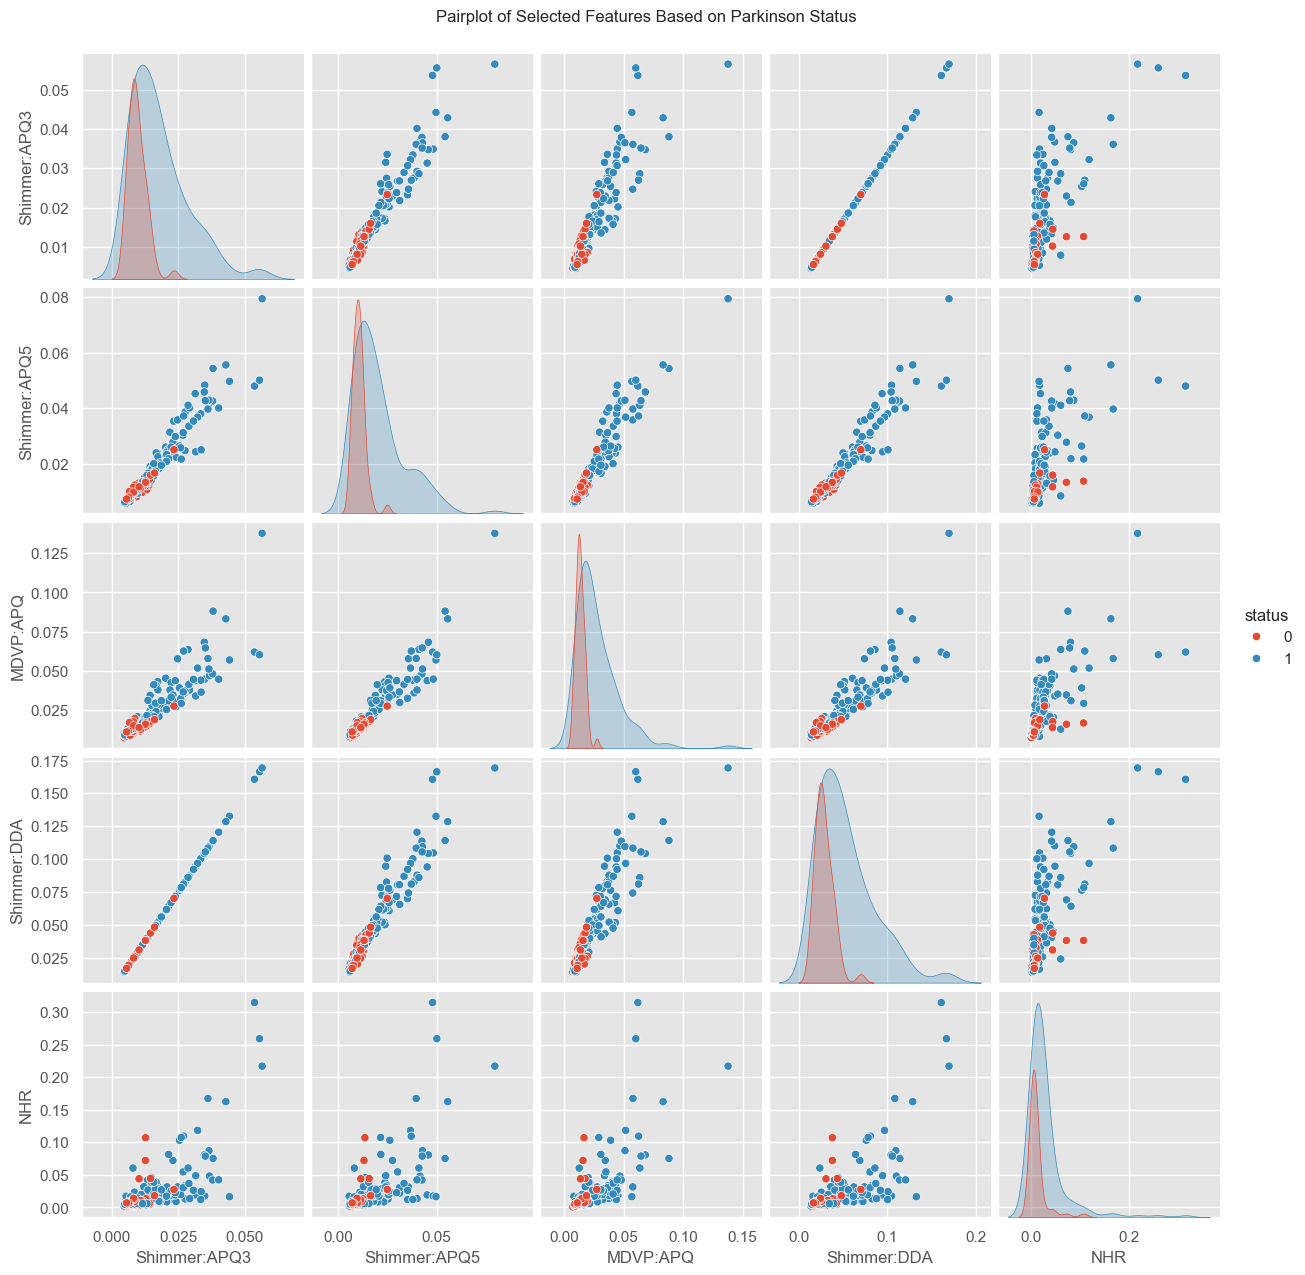

In [20]:
# Pairplot for visualization of the distribution of numerical variables based on the target class
sns.pairplot(df, hue='status', vars=df.columns[11:16])  # Only few features are selected for visualization
plt.suptitle('Pairplot of Selected Features Based on Parkinson Status', y=1.02)
plt.show()

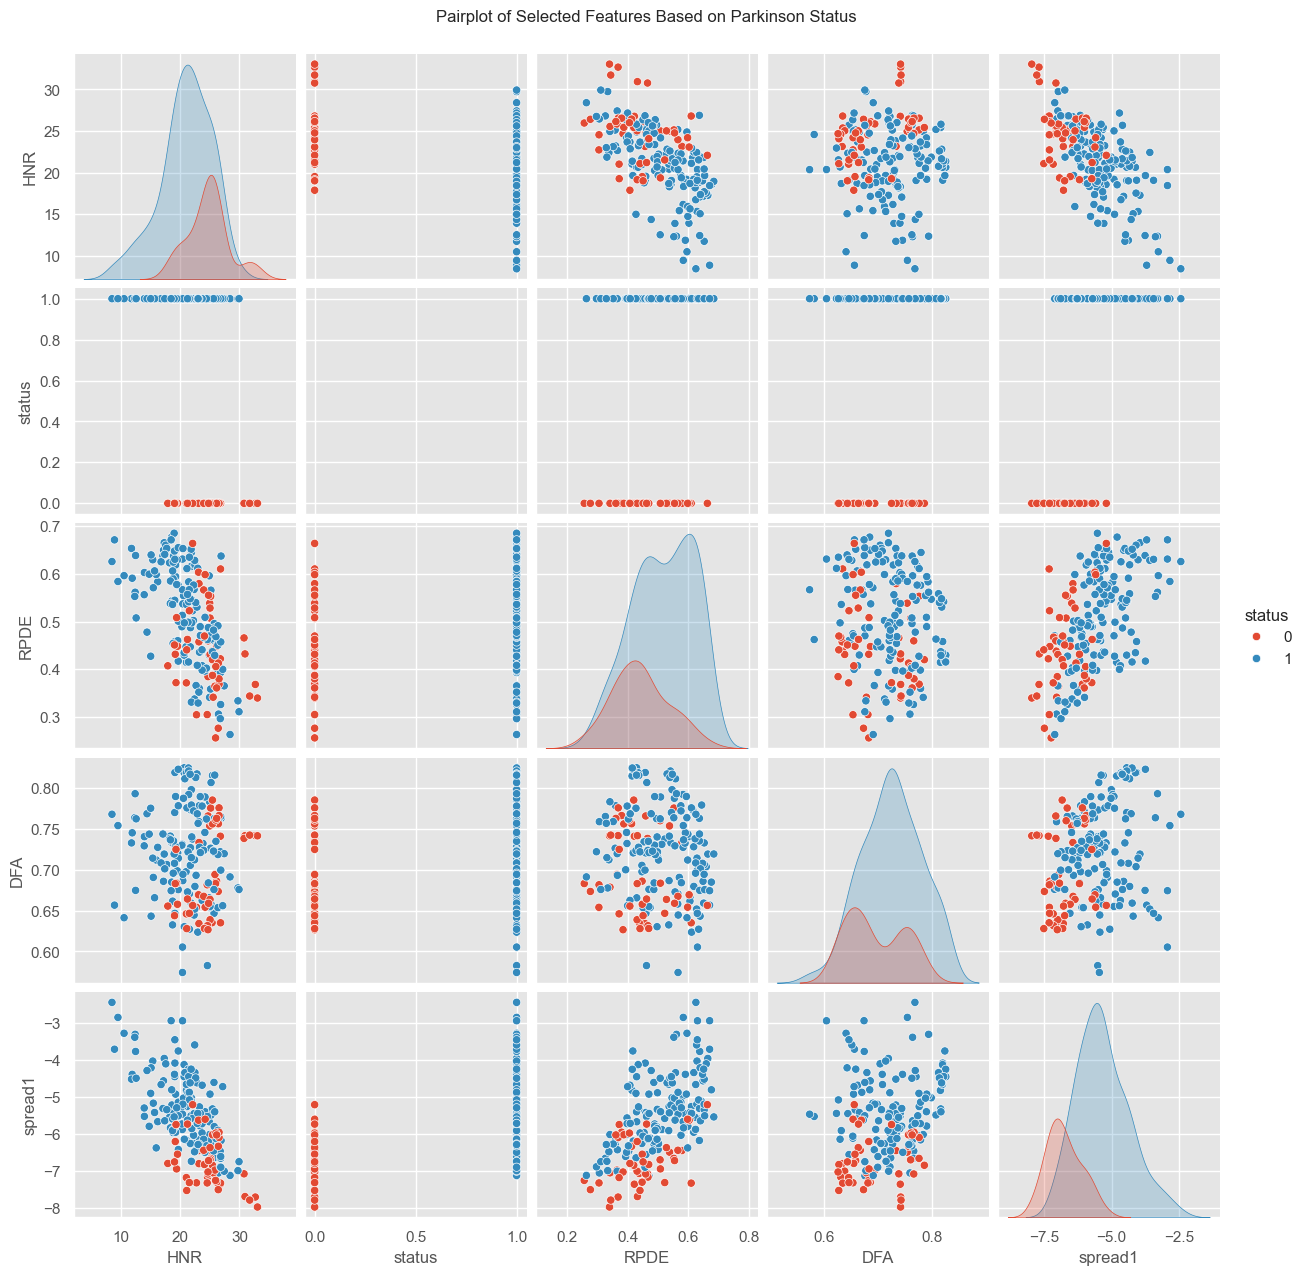

In [21]:
# Pairplot for visualization of the distribution of numerical variables based on the target class
sns.pairplot(df, hue='status', vars=df.columns[16:21])  # Only few features are selected for visualization
plt.suptitle('Pairplot of Selected Features Based on Parkinson Status', y=1.02)
plt.show()

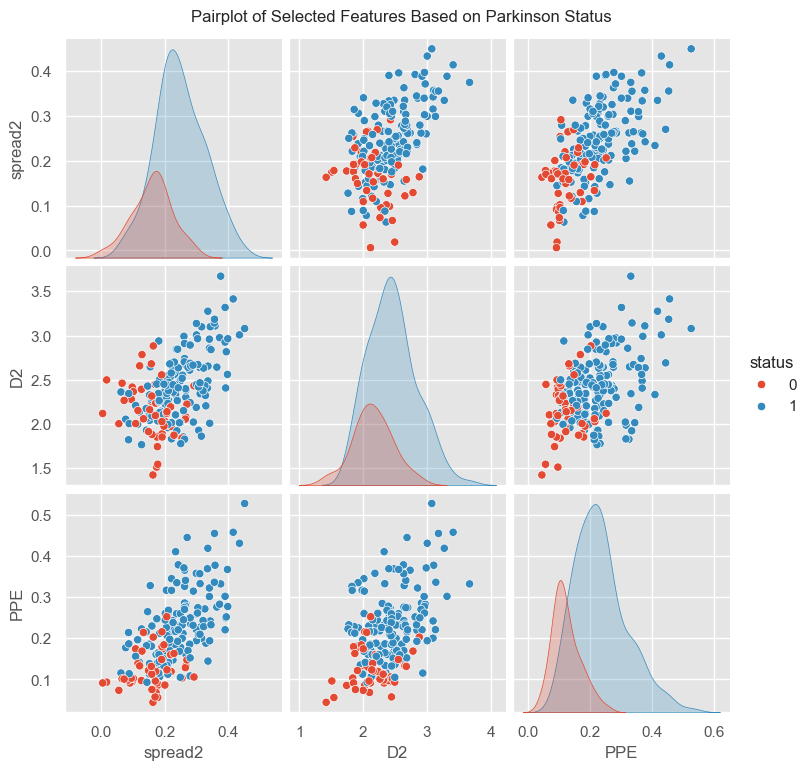

In [22]:
# Pairplot for visualization of the distribution of numerical variables based on the target class
sns.pairplot(df, hue='status', vars=df.columns[21:24])  # Only few features are selected for visualization
plt.suptitle('Pairplot of Selected Features Based on Parkinson Status', y=1.02)
plt.show()

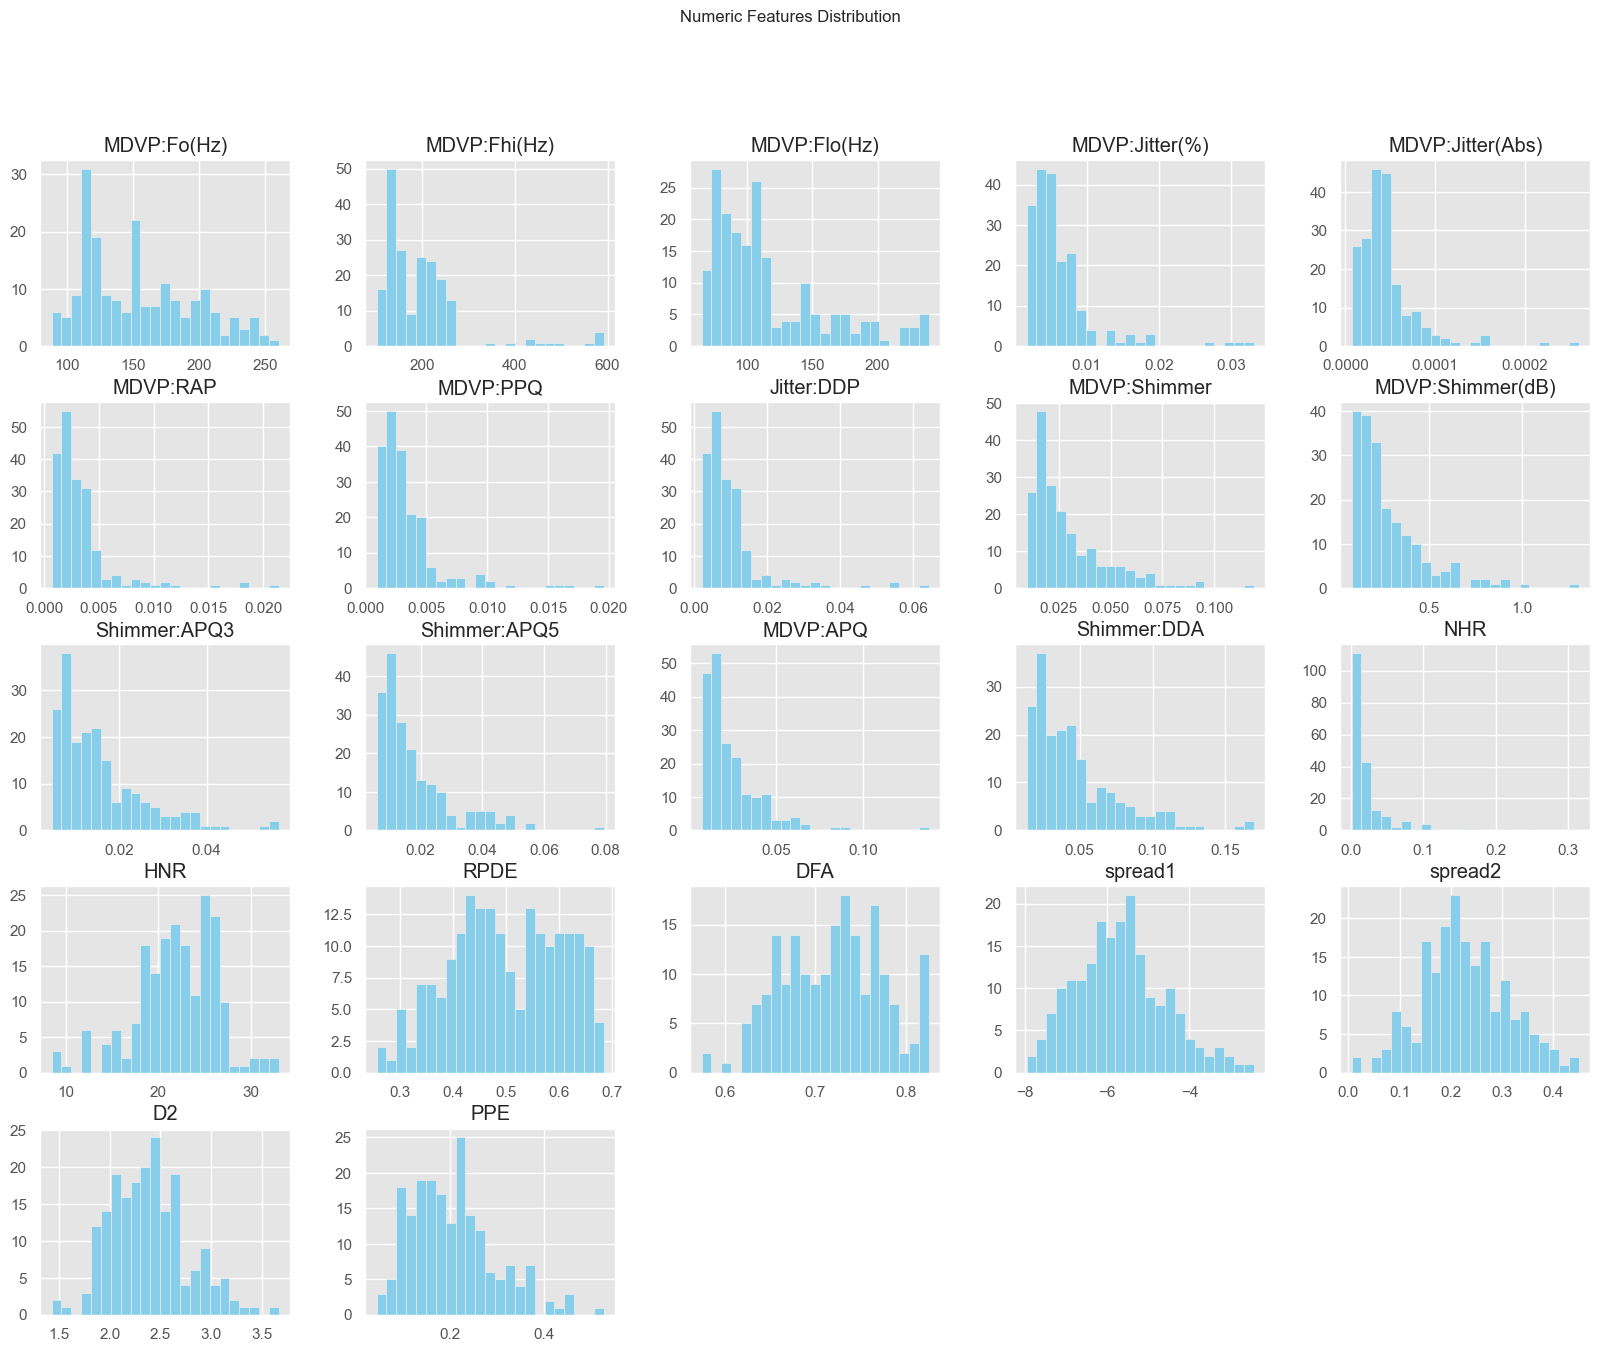

In [23]:
# Show histogram of the dataset features (except the target variable)
df.drop(columns=['status']).hist(bins=23, figsize=(20, 15), color='skyblue')
plt.suptitle('Numeric Features Distribution')
plt.show()

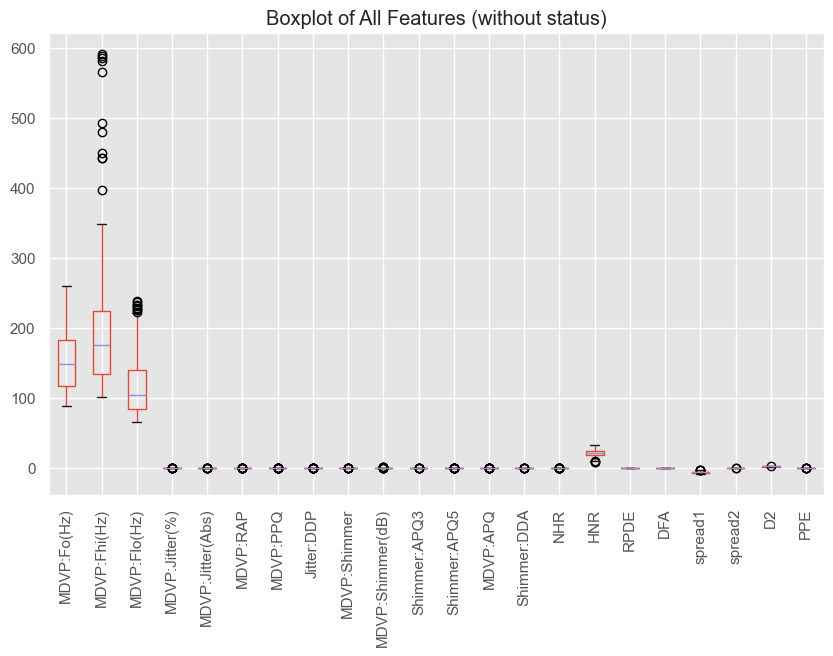

In [24]:
# Show outliers using boxplot for numerical features (except the target variable)
plt.figure(figsize=(10,6))
df.drop('status', axis=1).boxplot(rot=90)
plt.title('Boxplot of All Features (without status)')
plt.show()

# <div align="center"> PREPROCESSING DATA </div>

In [3]:
# Drop 'name' column from the dataset as it is not needed
df = df.drop(columns=['name'])

# Handle missing values (if any)
df = df.dropna()
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


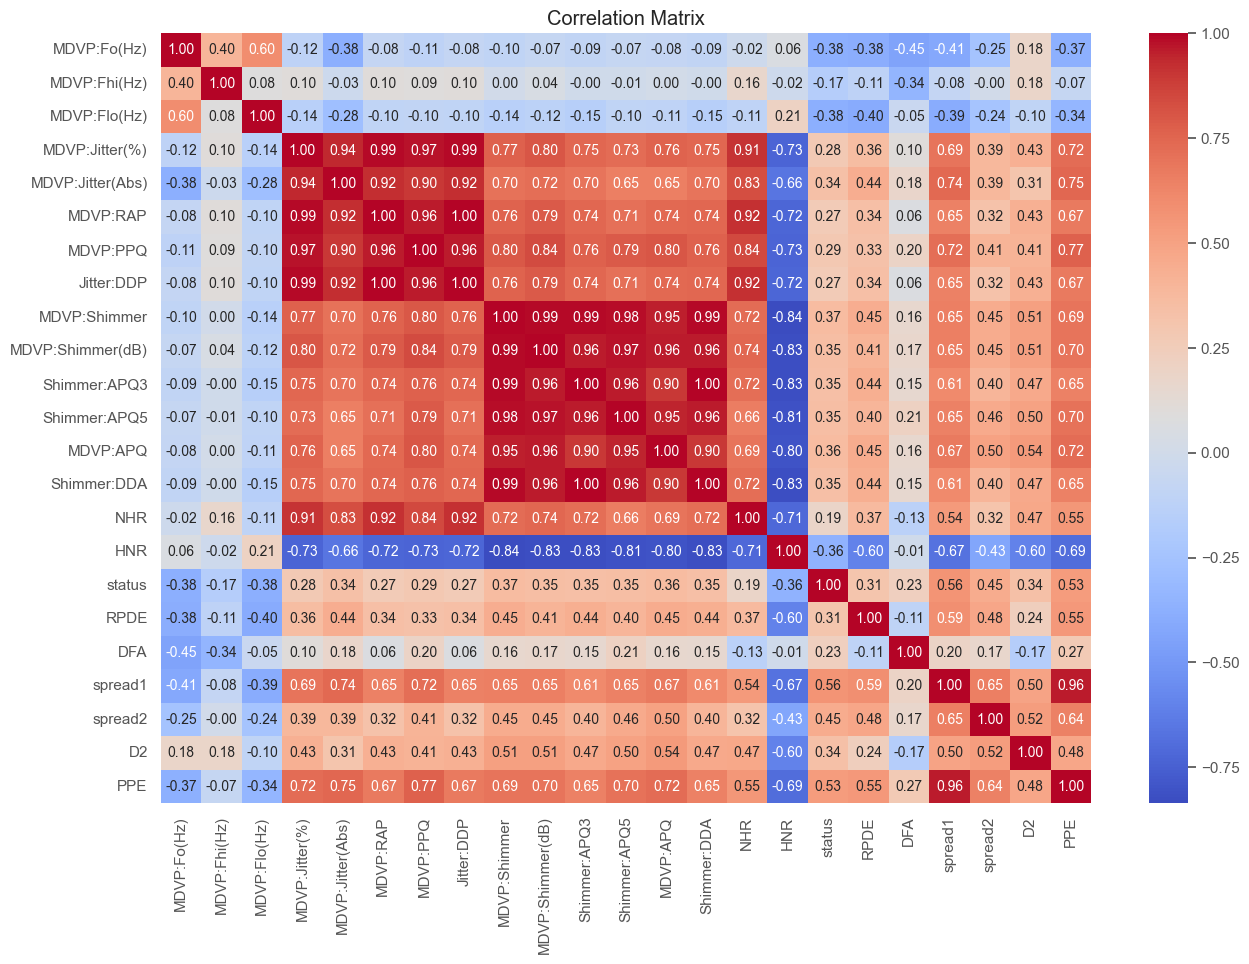

In [8]:
# Show the correlation matrix of the dataset
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Show the correlation of the features with the target variable 'status'
corr_with_target = correlation_matrix['status'].sort_values(ascending=False)
print(corr_with_target)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64


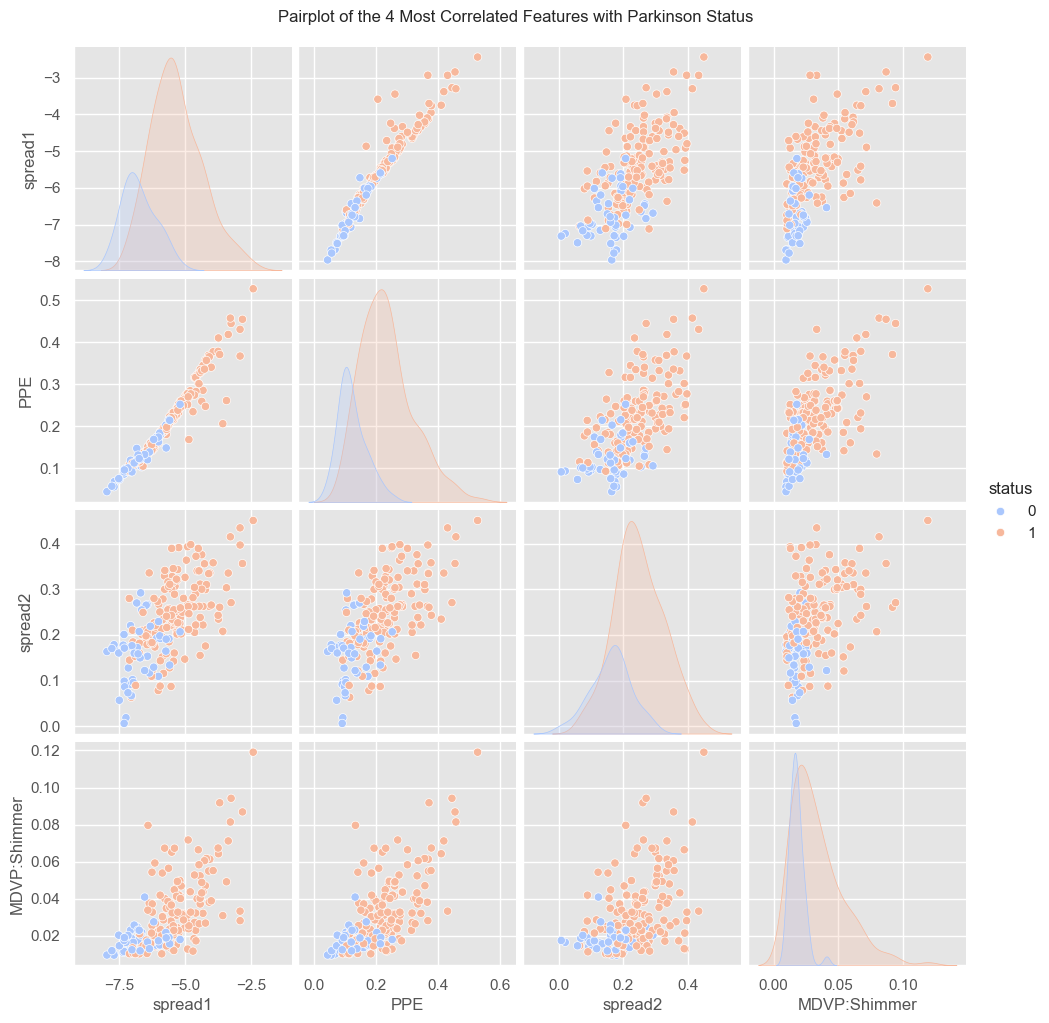

In [28]:
# Determine the features most correlated with 'status'
important_features = corr_with_target.index[1:5]

# Pairplot for the 4 features most correlated with 'status'
sns.pairplot(df, vars=important_features, hue="status", palette='coolwarm')
plt.suptitle('Pairplot of the 4 Most Correlated Features with Parkinson Status', y=1.02)
plt.show()

## Data Splitting

In [12]:
# Selecting features vector
X = df.drop(columns=['status'])

# Class Target
y = df['status']

# Count the number of samples in each class
class_counts = df['status'].value_counts()

# Show Samples Count from the dataset
print("Total Parkinson samples:", class_counts[1])  
print("Total Normal samples:", class_counts[0])
print("Total samples:", len(df))

Total Parkinson samples: 147
Total Normal samples: 48
Total samples: 195


In [13]:
# Show features
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


## Feature Selection Function

### PSO Feature Selection

In [6]:
# PSO Feature Selection Function
def pso_feature_selection(X, y, model=LogisticRegression(max_iter=1000), metric='accuracy', swarmsize=50, maxiter=100, random_state=42):
    """
    Performs PSO-based feature selection for a given dataset and model.

    Args:
        X: Input feature matrix.
        y: Target labels.
        model: Machine learning model to evaluate.
        metric: Evaluation metric (e.g., 'accuracy', 'f1_score').
        swarmsize: Swarm size for PSO.
        maxiter: Maximum number of iterations for PSO.

    Returns:
        Indices of selected features.
    """

    def objective_function(selected_features):
        selected_features = np.array(selected_features, dtype=bool)
        X_selected = X[:, selected_features]

        # Create a model instance with selected features
        model_selected = model.fit(X_selected, y)

        # Evaluate the model using cross-validation
        scores = cross_val_score(model_selected, X_selected, y, cv=5, scoring=metric)

        # Return the negative average score (to minimize)
        return -np.mean(scores)

    # Define the bounds for PSO (0 or 1 for each feature)
    lb = [0] * X.shape[1]
    ub = [1] * X.shape[1]

    # Run PSO
    selected_features, _ = pso(objective_function, lb, ub, swarmsize=swarmsize, maxiter=maxiter)

    # Convert the selected features to boolean
    selected_features = np.array(selected_features, dtype=bool)
    selected_features_indices = np.where(selected_features)[0]

    return selected_features_indices

### Gain Information Feature Selection

In [7]:
# Gain Information Selection Function
def gain_info_selection(X, y, threshold=0.1):
    # Calculate Information Gain for each feature
    info_gains = mutual_info_classif(X, y, random_state=42)  # Using random_state for reproducibility
    
    # Select features with information gain above the threshold
    selected_features_indices = np.where(info_gains > threshold)[0]
    
    return selected_features_indices

In [8]:
# General feature selection function
def feature_selection(X, y, usePSO=False, useInfoGain=False):
    if usePSO:
        # Using PSO for feature selection
        selected_features_indices = pso_feature_selection(X, y)
        X_selected = X[:, selected_features_indices]
    elif useInfoGain:
        # Using Information Gain for feature selection
        selected_features_indices = gain_info_selection(X, y)
        X_selected = X[:, selected_features_indices]
    else:
        # No feature selection
        X_selected = X

    return X_selected, selected_features_indices

## Scaler Function

In [9]:
# Function for scaling dataset using Standard Scaler
def scale_dataset(X, useStandardScaler=False):
    if useStandardScaler:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        return X_scaled
    else: 
        return X

## Resampling Function (Balancing the dataset)

In [10]:
# Resampling using Random Over Sampler (ROS) to balance the dataset classes
def balance_dataset(X, y, useROS=False):
    if useROS:
        ros = RandomOverSampler(random_state=42)
        X, y = ros.fit_resample(X, y)
    return X, y

## <div align="center">No Feature Selection</div>

In [14]:
#Feature Vector
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Scaled Feature Vector

In [15]:
# Scaling features
X_scaled = scale_dataset(X, useStandardScaler=True)

In [16]:
# Convert X_scaled back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.311189,-0.227459,0.593395,0.631498,...,0.199282,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.191272,0.002258,-0.116922,-0.099041,...,-0.313046,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929
192,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.797139,0.992069,-0.352453,-0.135053,...,-0.438466,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.164847,0.131755,-0.358834,-0.212223,...,-0.485202,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105


## Train-Test Split 60/40

In [17]:
#Splitting the dataset into the Training set (60%) and Test set (40%) without feature selection
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Show the shape of the dataset
print("Dataset Shape:", X_train.shape)

# Show the number of samples in each class
print("\nTraining set:")
print("Number of 1s (Parkinson):", sum(y_train == 1))
print("Number of 0s (Healthy):", sum(y_train == 0))

print("\nTest set:")
print("Number of 1s (Parkinson):", sum(y_test == 1))
print("Number of 0s (Healthy):", sum(y_test == 0))

Dataset Shape: (117, 22)

Training set:
Number of 1s (Parkinson): 89
Number of 0s (Healthy): 28

Test set:
Number of 1s (Parkinson): 58
Number of 0s (Healthy): 20


### Resampling Dataset

In [18]:
# Call the balance_dataset function to balance the dataset
X_train, y_train = balance_dataset(X_train, y_train, useROS=True)

# Show the shape of the balanced dataset
print("Balanced Dataset Shape:", X_train.shape)

# Show the number of samples in each class after balancing
print("\nTraining set after balancing:")
print("Number of 1s (Parkinson):", sum(y_train == 1))
print("Number of 0s (Healthy):", sum(y_train == 0))

print("\nTest set balancing:")
print("Number of 1s (Parkinson):", sum(y_test == 1))
print("Number of 0s (Healthy):", sum(y_test == 0))

Balanced Dataset Shape: (178, 22)

Training set after balancing:
Number of 1s (Parkinson): 89
Number of 0s (Healthy): 89

Test set balancing:
Number of 1s (Parkinson): 58
Number of 0s (Healthy): 20


## <div align="center">PSO Feature Selection</div>

### Select Feature Vector

In [32]:
# Call the feature_selection function to select the features using PSO

# turn feature vector into array
X_array = X.to_numpy()
X_selected_pso, selected_features_indices_pso = feature_selection(X_array, y, usePSO=True, useInfoGain=False)

Stopping search: maximum iterations reached --> 100


In [47]:
# Show the shape of the selected features
print("Selected Features Shape (PSO):", X_selected_pso.shape)

Selected Features Shape (PSO): (195, 18)


In [48]:
# Show the selected features
X_selected_pso_df = pd.DataFrame(X_selected_pso, columns=X.columns[selected_features_indices_pso])
X_selected_pso_df

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,RPDE,spread2,D2,PPE
0,119.992,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,0.414783,0.266482,2.301442,0.284654
1,122.400,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,0.458359,0.335590,2.486855,0.368674
2,116.682,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,0.429895,0.311173,2.342259,0.332634
3,116.676,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,0.434969,0.334147,2.405554,0.368975
4,116.014,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,0.417356,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,0.448439,0.121952,2.657476,0.133050
191,209.516,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,0.431674,0.129303,2.784312,0.168895
192,174.688,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,0.407567,0.158453,2.679772,0.131728
193,198.764,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,0.451221,0.207454,2.138608,0.123306


### Scaled Feature Vector

In [ ]:
# Normalize the selected features using Standard Scaler
X_scaled_pso = scale_dataset(X_selected_pso, useStandardScaler=True)
X_scaled_pso_df = pd.DataFrame(X_scaled_pso, columns=X.columns[selected_features_indices_pso])
X_scaled_pso_df

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,RPDE,spread2,D2,PPE
0,-0.829300,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.807838,0.480477,-0.210531,0.868886
1,-0.770972,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.387524,1.311185,0.275077,1.803605
2,-0.909476,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.662075,1.017682,-0.103629,1.402661
3,-0.909622,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.613134,1.293840,0.062145,1.806954
4,-0.925657,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.783021,0.096195,-0.130026,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,-0.508265,-0.337173,-0.401899,-0.228505,-0.311189,-0.227459,0.593395,0.631498,0.759926,0.592165,0.199282,0.759930,0.069278,-0.483208,-1.256837,0.721944,-0.817703
191,1.339202,-0.618218,-0.120037,-0.401899,0.001213,-0.191272,0.002258,-0.116922,-0.099041,0.037113,-0.109086,-0.313046,0.037108,-0.167360,-0.644916,-1.168475,1.054135,-0.418929
192,0.495578,-0.968393,1.526058,1.037674,0.991026,0.797139,0.992069,-0.352453,-0.135053,-0.294670,-0.352565,-0.438466,-0.294679,2.041513,-0.877441,-0.818079,0.780338,-0.832410
193,1.078761,-0.954180,0.243924,-0.113985,0.132963,0.164847,0.131755,-0.358834,-0.212223,-0.297633,-0.389254,-0.485202,-0.297970,1.175327,-0.456374,-0.229066,-0.637003,-0.926105


## Train-Test Split 60/40

In [50]:
#Splitting the dataset into the Training set (60%) and Test set (40%) using PSO feature selection
X_train_pso, X_test_pso, y_train_pso, y_test_pso = train_test_split(X_scaled_pso, y, test_size=0.4, random_state=42)

# Show the shape of the balanced dataset
print("Dataset Shape PSO:", X_train_pso.shape)

# Show the number of samples in each class
print("\nTraining set PSO:")
print("Number of 1s (Parkinson):", sum(y_train_pso == 1))
print("Number of 0s (Healthy):", sum(y_train_pso == 0))

print("\nTest set PSO:")
print("Number of 1s (Parkinson):", sum(y_test_pso == 1))
print("Number of 0s (Healthy):", sum(y_test_pso == 0))

Dataset Shape PSO: (117, 18)

Training set PSO:
Number of 1s (Parkinson): 89
Number of 0s (Healthy): 28

Test set PSO:
Number of 1s (Parkinson): 58
Number of 0s (Healthy): 20


### Resampling Dataset

In [51]:
# Call the balance_dataset function to balance the dataset
X_train_pso, y_train_pso = balance_dataset(X_train_pso, y_train_pso, useROS=True)

# Show the shape of the balanced dataset
print("Balanced Dataset Shape:", X_train_pso.shape)

# Show the number of samples in each class after balancing
print("\nTraining set PSO after balancing:")
print("Number of 1s (Parkinson):", sum(y_train_pso == 1))
print("Number of 0s (Healthy):", sum(y_train_pso == 0))

print("\nTest set PSO:")
print("Number of 1s (Parkinson):", sum(y_test_pso == 1))
print("Number of 0s (Healthy):", sum(y_test_pso == 0))

Balanced Dataset Shape: (178, 18)

Training set PSO after balancing:
Number of 1s (Parkinson): 89
Number of 0s (Healthy): 89

Test set PSO:
Number of 1s (Parkinson): 58
Number of 0s (Healthy): 20


## <div align="center">Gain Information Feature Selection</div>

### Select Feature Vector

In [52]:
# Call the feature_selection function to select the features using Information Gain
# turn feature vector into array
X_array = X.to_numpy()
X_selected_gain, selected_features_indices_gain = feature_selection(X_array, y, useInfoGain=True)

In [53]:
# Show the shape of the selected features
print("Selected Features Shape (Gain Information):", X_selected_gain.shape)

Selected Features Shape (Gain Information): (195, 16)


In [54]:
# Show the selected features
X_selected_gain_df = pd.DataFrame(X_selected_gain, columns=X.columns[selected_features_indices_gain])
X_selected_gain_df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,spread1,spread2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,-4.813031,0.266482,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,-4.075192,0.335590,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,-4.443179,0.311173,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,-4.117501,0.334147,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,-3.747787,0.234513,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,-6.538586,0.121952,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,-6.195325,0.129303,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,-6.787197,0.158453,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,-6.744577,0.207454,0.123306


### Scaled Feature Vector

In [55]:
# Normalize the selected features using Standard Scaler
X_scaled_gain = scale_dataset(X_selected_gain, useStandardScaler=True)
X_scaled_gain_df = pd.DataFrame(X_scaled_gain, columns=X.columns[selected_features_indices_gain])
X_scaled_gain_df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,spread1,spread2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.193225,0.801323,0.480477,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.634508,1.479853,1.311185,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.279760,1.141445,1.017682,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.281346,1.440945,1.293840,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.506745,1.780940,0.096195,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,0.593395,0.631498,0.759926,0.592165,0.199282,0.759930,0.069278,-0.536647,-0.785527,-1.256837,-0.817703
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,-0.116922,-0.099041,0.037113,-0.109086,-0.313046,0.037108,-0.167360,-0.620463,-0.469859,-1.168475,-0.418929
192,0.495578,0.470104,-0.968393,1.526058,1.037674,-0.352453,-0.135053,-0.294670,-0.352565,-0.438466,-0.294679,2.041513,-0.906799,-1.014154,-0.818079,-0.832410
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,-0.358834,-0.212223,-0.297633,-0.389254,-0.485202,-0.297970,1.175327,-0.649233,-0.974960,-0.229066,-0.926105


## Train-Test Split 60/40

In [56]:
#Splitting the dataset into the Training set (60%) and Test set (40%) using Gain Information feature selection
X_train_gain, X_test_gain, y_train_gain, y_test_gain = train_test_split(X_scaled_gain, y, test_size=0.4, random_state=42)

# Show the shape of the balanced dataset
print("Dataset Shape Gain:", X_train_gain.shape)

# Show the number of samples in each class
print("\nTraining set Gain:")
print("Number of 1s (Parkinson):", sum(y_train_gain == 1))
print("Number of 0s (Healthy):", sum(y_train_gain == 0))

print("\nTest set Gain:")
print("Number of 1s (Parkinson):", sum(y_test_gain == 1))
print("Number of 0s (Healthy):", sum(y_test_gain == 0))

Dataset Shape Gain: (117, 16)

Training set Gain:
Number of 1s (Parkinson): 89
Number of 0s (Healthy): 28

Test set Gain:
Number of 1s (Parkinson): 58
Number of 0s (Healthy): 20


### Resampling Dataset

In [57]:
# Call the balance_dataset function to balance the dataset
X_train_gain, y_train_gain = balance_dataset(X_train_gain, y_train_gain, useROS=True)

# Show the shape of the balanced dataset
print("Balanced Dataset Shape:", X_train_gain.shape)

# Show the number of samples in each class after balancing
print("\nTraining set Gain after balancing:")
print("Number of 1s (Parkinson):", sum(y_train_gain == 1))
print("Number of 0s (Healthy):", sum(y_train_gain == 0))

print("\nTest set Gain:")
print("Number of 1s (Parkinson):", sum(y_test_gain == 1))
print("Number of 0s (Healthy):", sum(y_test_gain == 0))

Balanced Dataset Shape: (178, 16)

Training set Gain after balancing:
Number of 1s (Parkinson): 89
Number of 0s (Healthy): 89

Test set Gain:
Number of 1s (Parkinson): 58
Number of 0s (Healthy): 20


## Training-Test Set Overview

In [58]:
# Show the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Show the shape of the training and test sets for PSO
print("Training set shape (PSO):", X_train_pso.shape, y_train_pso.shape)
print("Test set shape (PSO):", X_test_pso.shape, y_test_pso.shape)

# Show the shape of the training and test sets for Information Gain
print("Training set shape (Gain Information):", X_train_gain.shape, y_train_gain.shape)
print("Test set shape (Gain Information):", X_test_gain.shape, y_test_gain.shape)

# Show the number of samples in each class for the training set (No feature selection)
print("\nTraining set:")
print("Number of Parkinson samples:", np.count_nonzero(y_train == 1))
print("Number of Normal samples:", np.count_nonzero(y_train == 0))

# Show the number of samples in each class for the test set (No feature selection)
print("\nTest set:")
print("Number of Parkinson samples:", np.count_nonzero(y_test == 1))
print("Number of Normal samples:", np.count_nonzero(y_test == 0))

# Show the number of samples in each class for the training set (PSO)
print("\nTraining set (PSO):")
print("Number of Parkinson samples:", np.count_nonzero(y_train_pso == 1))
print("Number of Normal samples:", np.count_nonzero(y_train_pso == 0))

# Show the number of samples in each class for the test set (PSO)
print("\nTest set (PSO):")
print("Number of Parkinson samples:", np.count_nonzero(y_test_pso == 1))
print("Number of Normal samples:", np.count_nonzero(y_test_pso == 0))

# Show the number of samples in each class for the training set (Information Gain)
print("\nTraining set (Gain Information):")
print("Number of Parkinson samples:", np.count_nonzero(y_train_gain == 1))
print("Number of Normal samples:", np.count_nonzero(y_train_gain == 0))

# Show the number of samples in each class for the test set (Information Gain)
print("\nTest set (Gain Information):")
print("Number of Parkinson samples:", np.count_nonzero(y_test_gain == 1))
print("Number of Normal samples:", np.count_nonzero(y_test_gain == 0))


Training set shape: (178, 22) (178,)
Test set shape: (78, 22) (78,)
Training set shape (PSO): (178, 18) (178,)
Test set shape (PSO): (78, 18) (78,)
Training set shape (Gain Information): (178, 16) (178,)
Test set shape (Gain Information): (78, 16) (78,)

Training set:
Number of Parkinson samples: 89
Number of Normal samples: 89

Test set:
Number of Parkinson samples: 58
Number of Normal samples: 20

Training set (PSO):
Number of Parkinson samples: 89
Number of Normal samples: 89

Test set (PSO):
Number of Parkinson samples: 58
Number of Normal samples: 20

Training set (Gain Information):
Number of Parkinson samples: 89
Number of Normal samples: 89

Test set (Gain Information):
Number of Parkinson samples: 58
Number of Normal samples: 20


# <div align="center">Model Development</div>

## Gradient Boosting

Evaluation of Gradient Boosting Model (No feature selection):
Accuracy: 0.8846153846153846

Confusion Matrix:
[[14  6]
 [ 3 55]]

Classification Report - Train Set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        89
           1     1.0000    1.0000    1.0000        89

    accuracy                         1.0000       178
   macro avg     1.0000    1.0000    1.0000       178
weighted avg     1.0000    1.0000    1.0000       178


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     0.8235    0.7000    0.7568        20
           1     0.9016    0.9483    0.9244        58

    accuracy                         0.8846        78
   macro avg     0.8626    0.8241    0.8406        78
weighted avg     0.8816    0.8846    0.8814        78



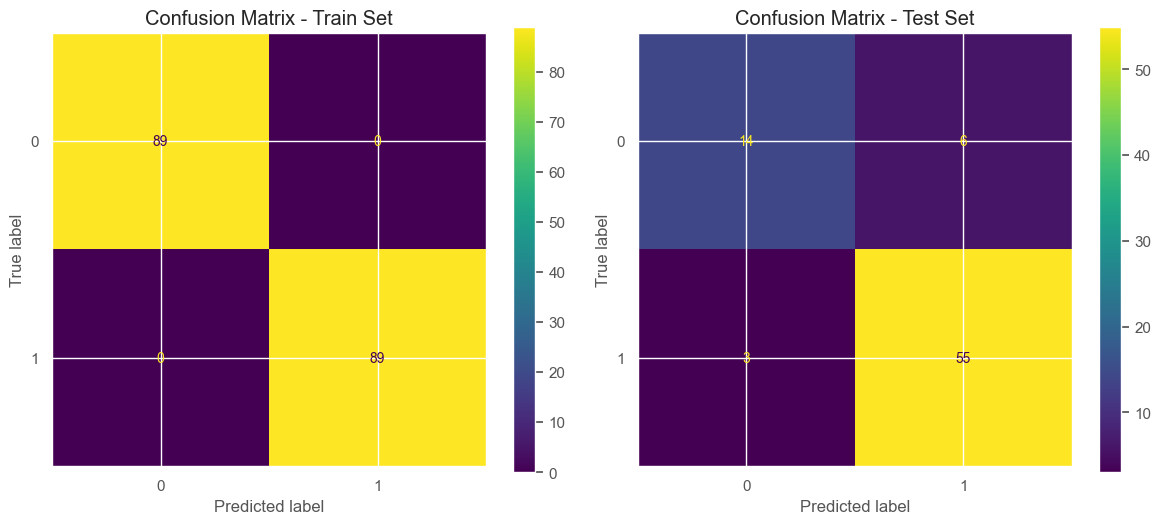

Evaluation of Gradient Boosting Model (PSO):
Accuracy: 0.9102564102564102

Confusion Matrix:
[[15  5]
 [ 2 56]]

Classification Report - Train Set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        89
           1     1.0000    1.0000    1.0000        89

    accuracy                         1.0000       178
   macro avg     1.0000    1.0000    1.0000       178
weighted avg     1.0000    1.0000    1.0000       178


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     0.8824    0.7500    0.8108        20
           1     0.9180    0.9655    0.9412        58

    accuracy                         0.9103        78
   macro avg     0.9002    0.8578    0.8760        78
weighted avg     0.9089    0.9103    0.9077        78



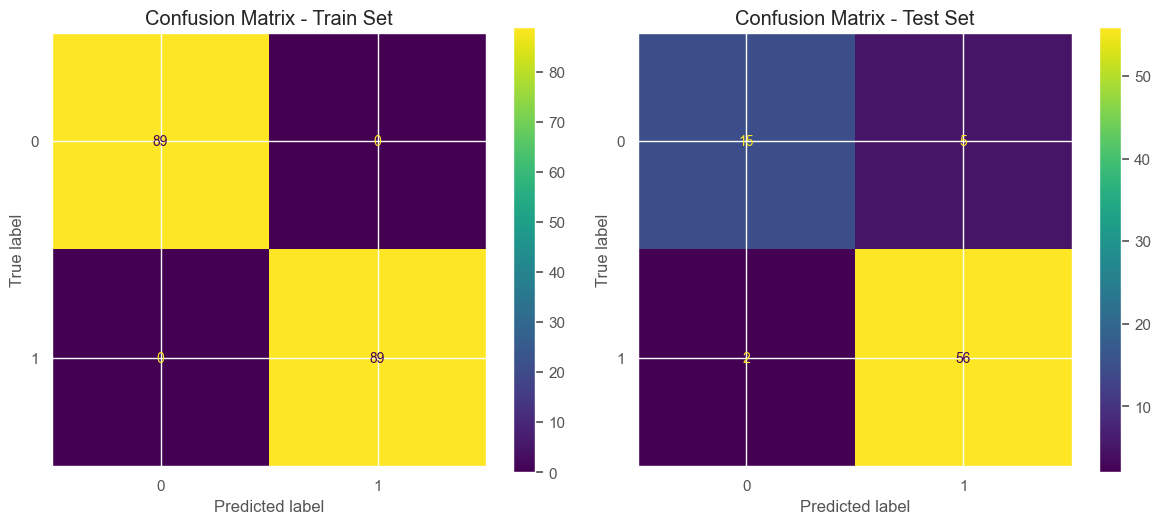

Evaluation of Gradient Boosting Model (Information Gain):
Accuracy: 0.8974358974358975

Confusion Matrix:
[[15  5]
 [ 3 55]]

Classification Report - Train Set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        89
           1     1.0000    1.0000    1.0000        89

    accuracy                         1.0000       178
   macro avg     1.0000    1.0000    1.0000       178
weighted avg     1.0000    1.0000    1.0000       178


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     0.8333    0.7500    0.7895        20
           1     0.9167    0.9483    0.9322        58

    accuracy                         0.8974        78
   macro avg     0.8750    0.8491    0.8608        78
weighted avg     0.8953    0.8974    0.8956        78



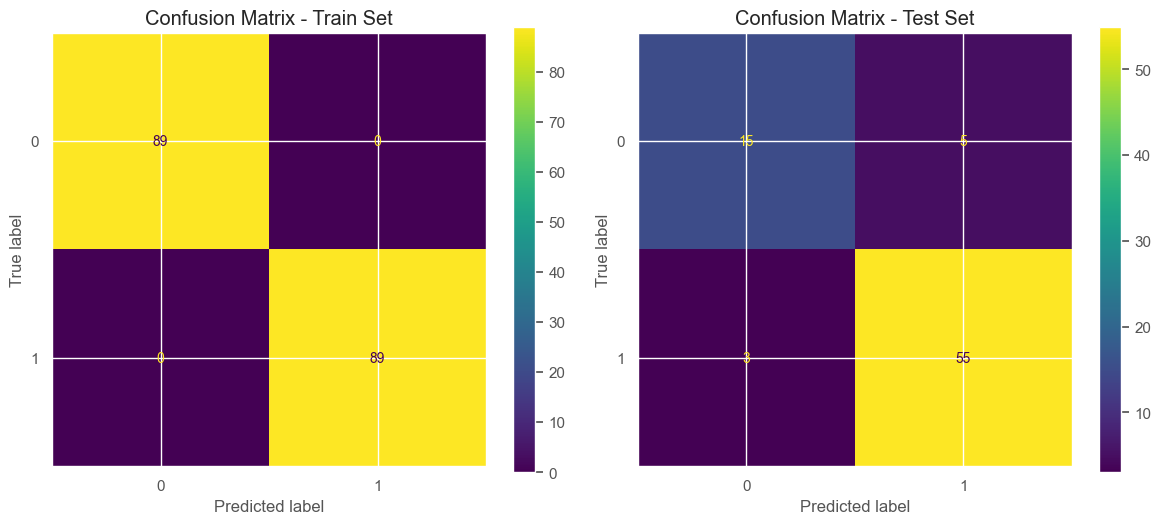

In [59]:
# make each pso and gain to Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting model instance
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model using the training sets (No feature selection)
gb_model.fit(X_train, y_train)

# Predict the target values using the test set (No feature selection)
y_pred_train_GB = gb_model.predict(X_train)
y_pred_GB = gb_model.predict(X_test)

# Train the model using the training sets (PSO)
gb_model.fit(X_train_pso, y_train_pso)

# Predict the target values using the test set (PSO)
y_pred_train_GB_pso = gb_model.predict(X_train_pso)
y_pred_GB_pso = gb_model.predict(X_test_pso)

# Train the model using the training sets (Information Gain)
gb_model.fit(X_train_gain, y_train_gain)

# Predict the target values using the test set (Information Gain)
y_pred_train_GB_gain = gb_model.predict(X_train_gain)
y_pred_GB_gain = gb_model.predict(X_test_gain)

# Evaluate the model using the test set (No feature selection)
print("Evaluation of Gradient Boosting Model (No feature selection):")
print("Accuracy:", accuracy_score(y_test, y_pred_GB))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_GB))
print("\nClassification Report - Train Set:")
print(classification_report(y_train, y_pred_train_GB, digits=4))
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_pred_GB, digits=4))

# Confusion Matrix for Train Set (No feature selection)
cm_train_GB = confusion_matrix(y_train, y_pred_train_GB)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_GB, display_labels=np.unique(y))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

# Confusion Matrix for Test Set (No feature selection)
cm_test_GB = confusion_matrix(y_test, y_pred_GB)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_GB, display_labels=np.unique(y))

disp1.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()

# Evaluate the model using the test set (PSO)
print("Evaluation of Gradient Boosting Model (PSO):")
print("Accuracy:", accuracy_score(y_test_pso, y_pred_GB_pso))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_pso, y_pred_GB_pso))
print("\nClassification Report - Train Set:")
print(classification_report(y_train_pso, y_pred_train_GB_pso, digits=4))
print("\nClassification Report - Test Set:")
print(classification_report(y_test_pso, y_pred_GB_pso, digits=4))

# Confusion Matrix for Train Set (PSO)
cm_train_pso = confusion_matrix(y_train_pso, y_pred_train_GB_pso)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_pso, display_labels=np.unique(y))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

# Confusion Matrix for Test Set (PSO)
cm_test_GB_pso = confusion_matrix(y_test_pso, y_pred_GB_pso)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_GB_pso, display_labels=np.unique(y))

disp1.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()

# Evaluate the model using the test set (Information Gain)
print("Evaluation of Gradient Boosting Model (Information Gain):")
print("Accuracy:", accuracy_score(y_test_gain, y_pred_GB_gain))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_gain, y_pred_GB_gain))
print("\nClassification Report - Train Set:")
print(classification_report(y_train_gain, y_pred_train_GB_gain, digits=4))
print("\nClassification Report - Test Set:")
print(classification_report(y_test_gain, y_pred_GB_gain, digits=4))

# Confusion Matrix for Train Set (Gain Information)
cm_train_GB_gain = confusion_matrix(y_train_gain, y_pred_train_GB_gain)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_GB_gain, display_labels=np.unique(y))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

# Confusion Matrix for Test Set (Gain Information)
cm_test_GB_gain = confusion_matrix(y_test_gain, y_pred_GB_gain)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_GB_gain, display_labels=np.unique(y))

disp1.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()


## XGBoost

Evaluation of XGBoost Model (No feature selection):
Accuracy: 0.9230769230769231

Confusion Matrix:
[[16  4]
 [ 2 56]]

Classification Report - Train Set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        89
           1     1.0000    1.0000    1.0000        89

    accuracy                         1.0000       178
   macro avg     1.0000    1.0000    1.0000       178
weighted avg     1.0000    1.0000    1.0000       178


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     0.8889    0.8000    0.8421        20
           1     0.9333    0.9655    0.9492        58

    accuracy                         0.9231        78
   macro avg     0.9111    0.8828    0.8956        78
weighted avg     0.9219    0.9231    0.9217        78



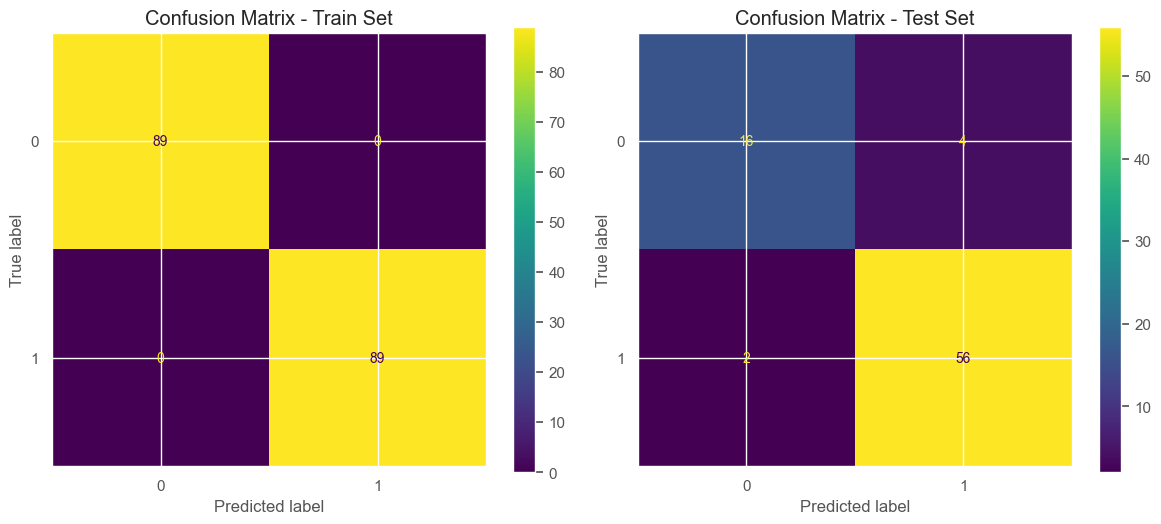

Evaluation of XGBoost Model (PSO):
Accuracy: 0.9230769230769231

Confusion Matrix:
[[16  4]
 [ 2 56]]

Classification Report - Train Set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        89
           1     1.0000    1.0000    1.0000        89

    accuracy                         1.0000       178
   macro avg     1.0000    1.0000    1.0000       178
weighted avg     1.0000    1.0000    1.0000       178


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     0.8889    0.8000    0.8421        20
           1     0.9333    0.9655    0.9492        58

    accuracy                         0.9231        78
   macro avg     0.9111    0.8828    0.8956        78
weighted avg     0.9219    0.9231    0.9217        78



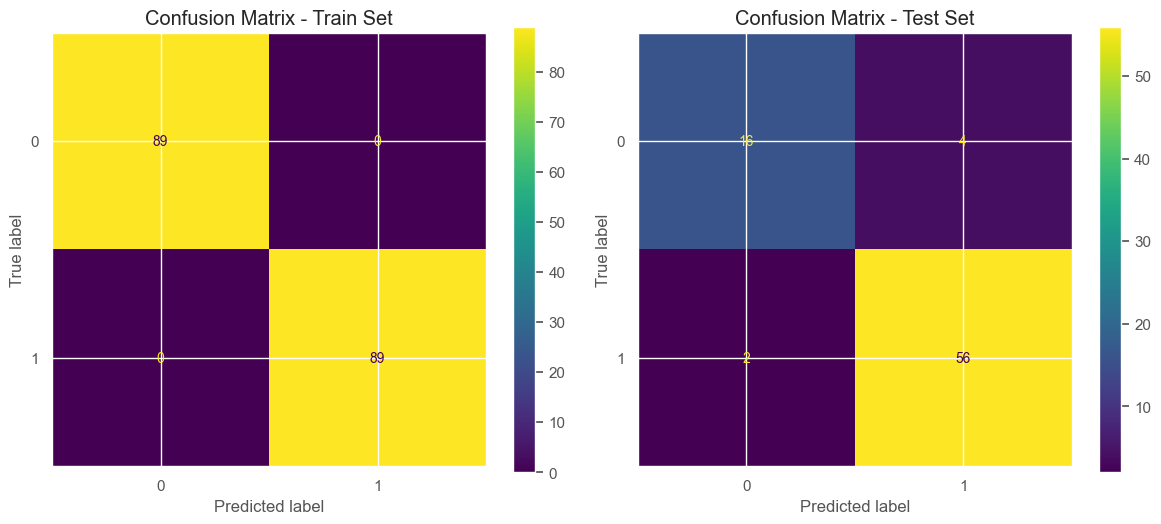

Evaluation of XGBoost Model (Information Gain):
Accuracy: 0.9358974358974359

Confusion Matrix:
[[17  3]
 [ 2 56]]

Classification Report - Train Set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        89
           1     1.0000    1.0000    1.0000        89

    accuracy                         1.0000       178
   macro avg     1.0000    1.0000    1.0000       178
weighted avg     1.0000    1.0000    1.0000       178


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     0.8947    0.8500    0.8718        20
           1     0.9492    0.9655    0.9573        58

    accuracy                         0.9359        78
   macro avg     0.9219    0.9078    0.9145        78
weighted avg     0.9352    0.9359    0.9353        78



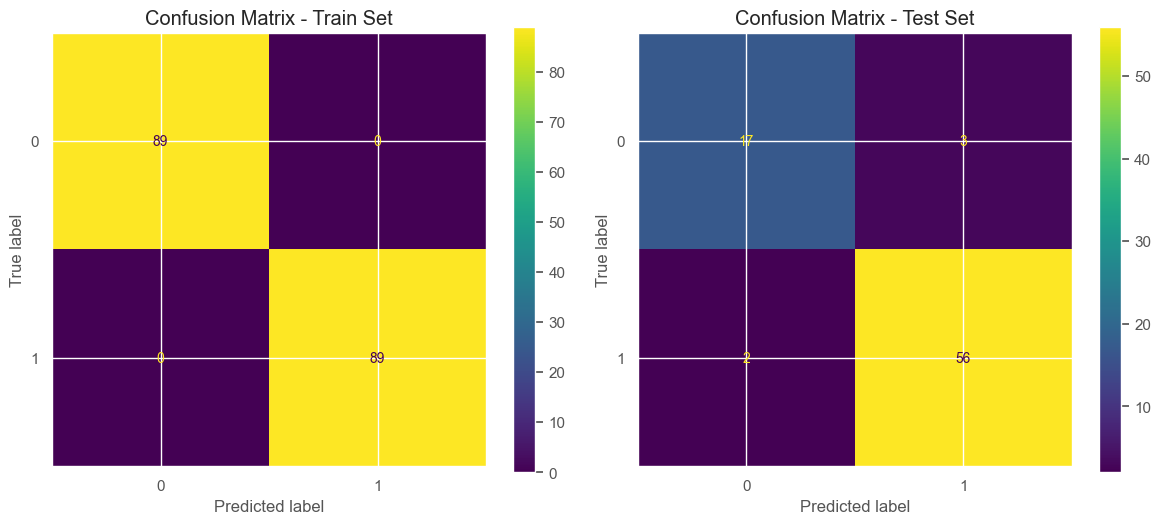

In [60]:
# make each pso and gain to XGboost
from xgboost import XGBClassifier

# Create a XGBoost model instance
xgb_model = XGBClassifier(random_state=42)

# Train the model using the training sets (No feature selection)
xgb_model.fit(X_train, y_train)

# Predict the target values using the test set (No feature selection)
y_pred_train_XGB = xgb_model.predict(X_train)
y_pred_XGB = xgb_model.predict(X_test)

# Train the model using the training sets (PSO)
xgb_model.fit(X_train_pso, y_train_pso)

# Predict the target values using the test set (PSO)
y_pred_train_XGB_pso = xgb_model.predict(X_train_pso)
y_pred_XGB_pso = xgb_model.predict(X_test_pso)

# Train the model using the training sets (Information Gain)
xgb_model.fit(X_train_gain, y_train_gain)

# Predict the target values using the test set (Information Gain)
y_pred_train_XGB_gain = xgb_model.predict(X_train_gain)
y_pred_XGB_gain = xgb_model.predict(X_test_gain)

# Evaluate the model using the test set (No feature selection)
print("Evaluation of XGBoost Model (No feature selection):")
print("Accuracy:", accuracy_score(y_test, y_pred_XGB))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_XGB))
print("\nClassification Report - Train Set:")
print(classification_report(y_train, y_pred_train_XGB, digits=4))
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_pred_XGB, digits=4))

# Confusion Matrix for Train Set (No feature selection)
cm_train_XGB = confusion_matrix(y_train, y_pred_train_XGB)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_XGB, display_labels=np.unique(y))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

# Confusion Matrix for Test Set (No feature selection)
cm_test_XGB = confusion_matrix(y_test, y_pred_XGB)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_XGB, display_labels=np.unique(y))

disp1.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()

# Evaluate the model using the test set (PSO)
print("Evaluation of XGBoost Model (PSO):")
print("Accuracy:", accuracy_score(y_test_pso, y_pred_XGB_pso))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_pso, y_pred_XGB_pso))
print("\nClassification Report - Train Set:")
print(classification_report(y_train_pso, y_pred_train_XGB_pso, digits=4))
print("\nClassification Report - Test Set:")
print(classification_report(y_test_pso, y_pred_XGB_pso, digits=4))

# Confusion Matrix for Train Set (PSO)
cm_train_XGB_pso = confusion_matrix(y_train_pso, y_pred_train_XGB_pso)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_XGB_pso, display_labels=np.unique(y))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

# Confusion Matrix for Test Set (PSO)
cm_test_XGB_pso = confusion_matrix(y_test_pso, y_pred_XGB_pso)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_XGB_pso, display_labels=np.unique(y))

disp1.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()

# Evaluate the model using the test set (Information Gain)
print("Evaluation of XGBoost Model (Information Gain):")
print("Accuracy:", accuracy_score(y_test_gain, y_pred_XGB_gain))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_gain, y_pred_XGB_gain))
print("\nClassification Report - Train Set:")
print(classification_report(y_train_gain, y_pred_train_XGB_gain, digits=4))
print("\nClassification Report - Test Set:")
print(classification_report(y_test_gain, y_pred_XGB_gain, digits=4))

# Confusion Matrix for Train Set (Gain Information)
cm_train_XGB_gain = confusion_matrix(y_train_gain, y_pred_train_XGB_gain)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_XGB_gain, display_labels=np.unique(y))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

# Confusion Matrix for Test Set (Gain Information)
cm_test_XGB_gain = confusion_matrix(y_test_gain, y_pred_XGB_gain)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_XGB_gain, display_labels=np.unique(y))

disp1.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()


Evaluation of LightGBM Model (No feature selection):
Accuracy: 0.9487179487179487

Confusion Matrix:
[[16  4]
 [ 0 58]]

Classification Report - Train Set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        89
           1     1.0000    1.0000    1.0000        89

    accuracy                         1.0000       178
   macro avg     1.0000    1.0000    1.0000       178
weighted avg     1.0000    1.0000    1.0000       178


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     1.0000    0.8000    0.8889        20
           1     0.9355    1.0000    0.9667        58

    accuracy                         0.9487        78
   macro avg     0.9677    0.9000    0.9278        78
weighted avg     0.9520    0.9487    0.9467        78



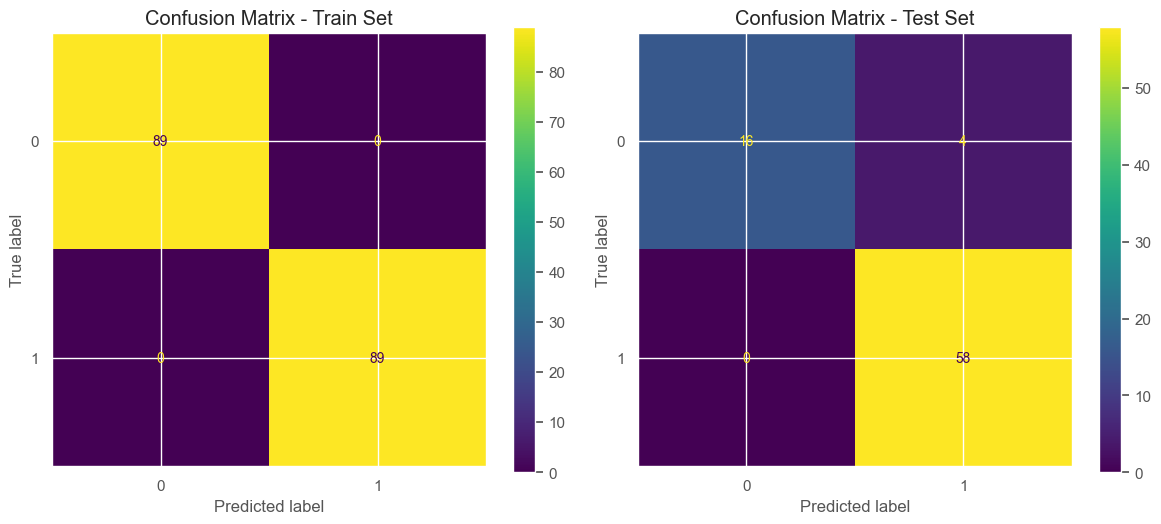

Evaluation of LightGBM Model (PSO):
Accuracy: 0.9358974358974359

Confusion Matrix:
[[16  4]
 [ 1 57]]

Classification Report - Train Set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        89
           1     1.0000    1.0000    1.0000        89

    accuracy                         1.0000       178
   macro avg     1.0000    1.0000    1.0000       178
weighted avg     1.0000    1.0000    1.0000       178


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     0.9412    0.8000    0.8649        20
           1     0.9344    0.9828    0.9580        58

    accuracy                         0.9359        78
   macro avg     0.9378    0.8914    0.9114        78
weighted avg     0.9362    0.9359    0.9341        78



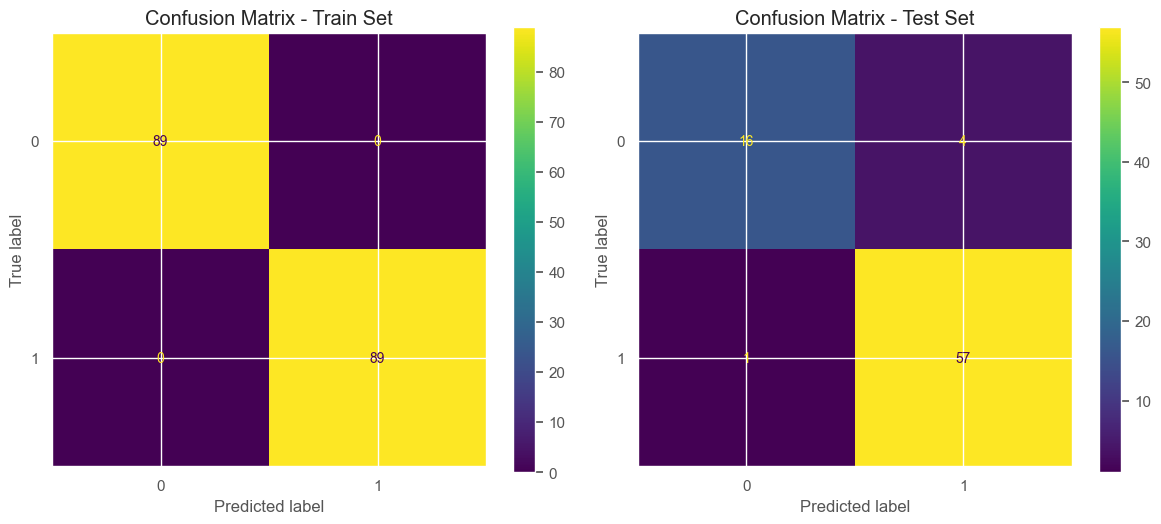

Evaluation of LightGBM Model (Information Gain):
Accuracy: 0.8974358974358975

Confusion Matrix:
[[15  5]
 [ 3 55]]

Classification Report - Train Set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        89
           1     1.0000    1.0000    1.0000        89

    accuracy                         1.0000       178
   macro avg     1.0000    1.0000    1.0000       178
weighted avg     1.0000    1.0000    1.0000       178


Classification Report - Test Set:
              precision    recall  f1-score   support

           0     0.8333    0.7500    0.7895        20
           1     0.9167    0.9483    0.9322        58

    accuracy                         0.8974        78
   macro avg     0.8750    0.8491    0.8608        78
weighted avg     0.8953    0.8974    0.8956        78



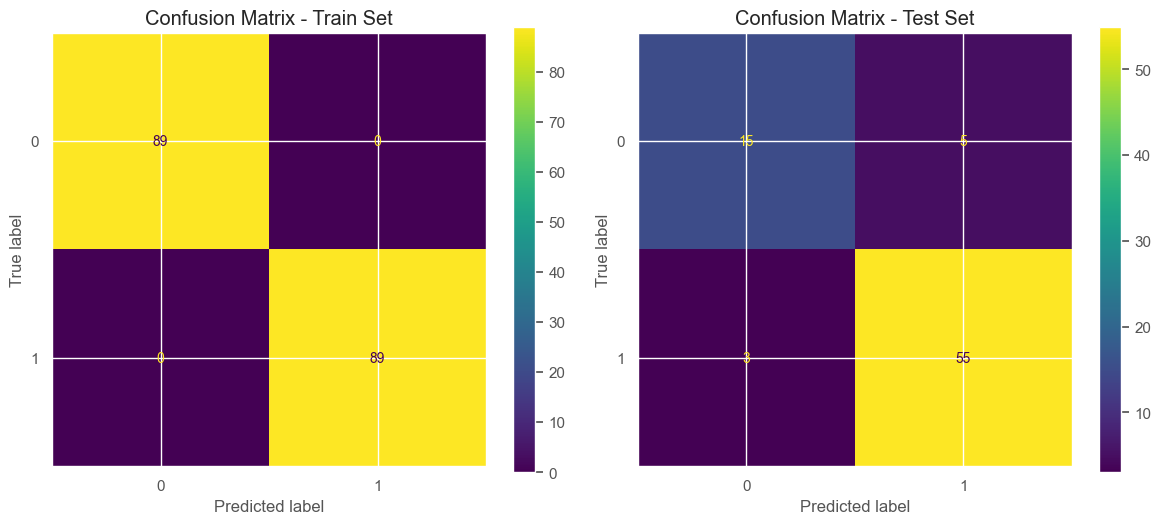

In [65]:
# make each pso and gain to LightGBM
from lightgbm import LGBMClassifier

# Create a LightGBM model instance with verbose set to -1
lgb_model = LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1)

# Train the model using the training sets (No feature selection)
lgb_model.fit(X_train, y_train)

# Predict the target values using the test set (No feature selection)
y_pred_train_LGBM = lgb_model.predict(X_train)
y_pred_LGBM = lgb_model.predict(X_test)

# Train the model using the training sets (PSO)
lgb_model.fit(X_train_pso, y_train_pso)

# Predict the target values using the test set (PSO)
y_pred_train_LGBM_pso = lgb_model.predict(X_train_pso)
y_pred_LGBM_pso = lgb_model.predict(X_test_pso)

# Train the model using the training sets (Information Gain)
lgb_model.fit(X_train_gain, y_train_gain)

# Predict the target values using the test set (Information Gain)
y_pred_train_LGBM_gain = lgb_model.predict(X_train_gain)
y_pred_LGBM_gain = lgb_model.predict(X_test_gain)

# Evaluate the model using the test set (No feature selection)
print("\nEvaluation of LightGBM Model (No feature selection):")
print("Accuracy:", accuracy_score(y_test, y_pred_LGBM))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_LGBM))
print("\nClassification Report - Train Set:")
print(classification_report(y_train, y_pred_train_LGBM, digits=4))
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_pred_LGBM, digits=4))

# Confusion Matrix for Train Set (No feature selection)
cm_train_LGBM = confusion_matrix(y_train_pso, y_pred_train_LGBM)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_LGBM, display_labels=np.unique(y))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

# Confusion Matrix for Test Set (No feature selection)
cm_test_LGBM = confusion_matrix(y_test, y_pred_LGBM)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_LGBM, display_labels=np.unique(y))

disp1.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()

# Evaluate the model using the test set (PSO)
print("Evaluation of LightGBM Model (PSO):")
print("Accuracy:", accuracy_score(y_test_pso, y_pred_LGBM_pso))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_pso, y_pred_LGBM_pso))
print("\nClassification Report - Train Set:")
print(classification_report(y_train_pso, y_pred_train_LGBM_pso, digits=4))
print("\nClassification Report - Test Set:")
print(classification_report(y_test_pso, y_pred_LGBM_pso, digits=4))

# Confusion Matrix for Train Set (PSO)
cm_train_LGBM_pso = confusion_matrix(y_train_pso, y_pred_train_LGBM_pso)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_LGBM_pso, display_labels=np.unique(y))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

# Confusion Matrix for Test Set (PSO)
cm_test_LGBM_pso = confusion_matrix(y_test_pso, y_pred_LGBM_pso)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_LGBM_pso, display_labels=np.unique(y))

disp1.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()

# Evaluate the model using the test set (Information Gain)
print("Evaluation of LightGBM Model (Information Gain):")
print("Accuracy:", accuracy_score(y_test_gain, y_pred_LGBM_gain))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_gain, y_pred_LGBM_gain))
print("\nClassification Report - Train Set:")
print(classification_report(y_train_gain, y_pred_train_LGBM_gain, digits=4))
print("\nClassification Report - Test Set:")
print(classification_report(y_test_gain, y_pred_LGBM_gain, digits=4))

# Confusion Matrix for Train Set (Gain Information)
cm_train_LGBM_gain = confusion_matrix(y_train_gain, y_pred_train_LGBM_gain)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_LGBM_gain, display_labels=np.unique(y))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
disp_train.plot(ax=ax1, values_format='d')
ax1.set_title('Confusion Matrix - Train Set')

# Confusion Matrix for Test Set (Gain Information)
cm_test_LGBM_gain = confusion_matrix(y_test_gain, y_pred_LGBM_gain)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test_LGBM_gain, display_labels=np.unique(y))

disp1.plot(ax=ax2, values_format='d')
ax2.set_title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()

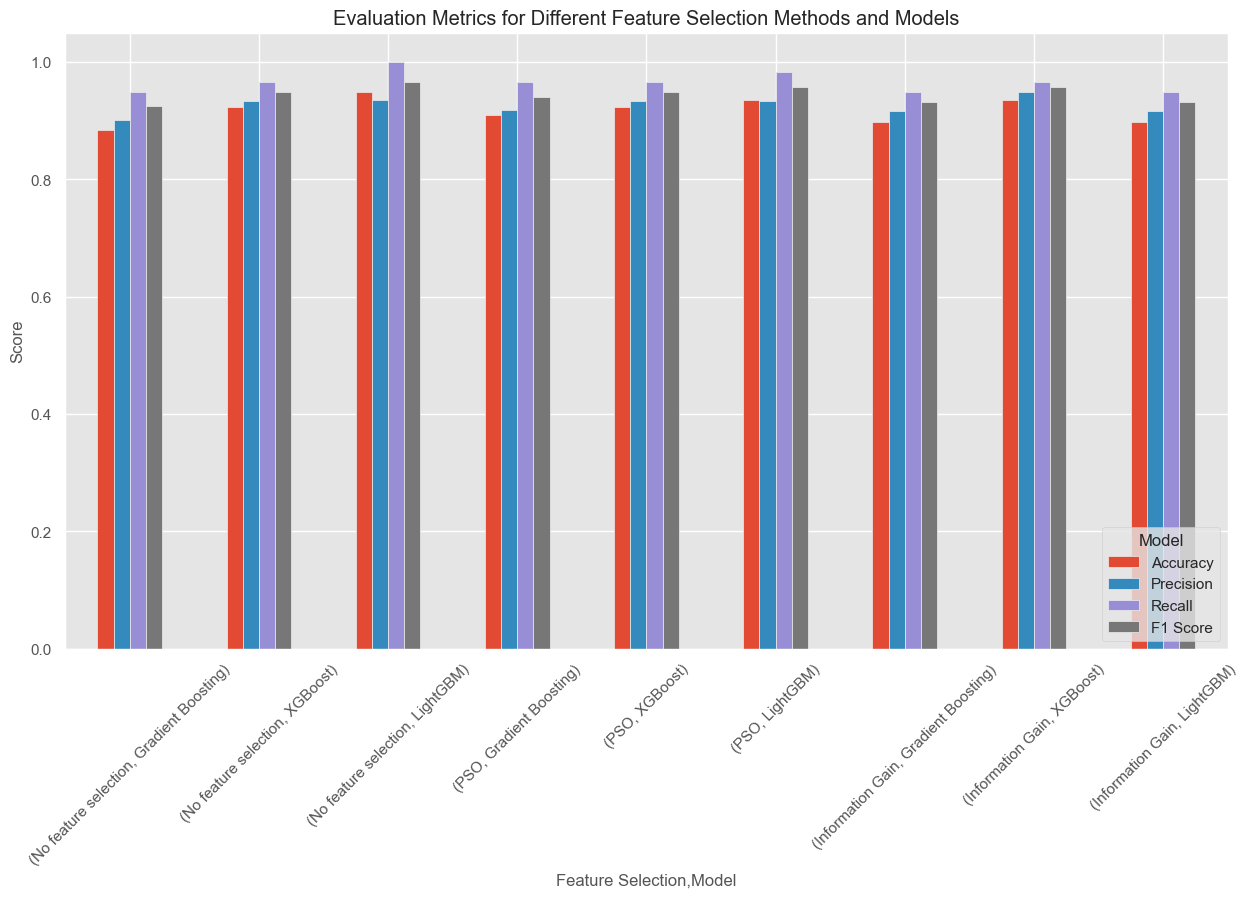

In [62]:
# make a plot for compare each feature selection by model
# Create a list of models
models = ['Gradient Boosting', 'XGBoost', 'LightGBM']

# Create a list of evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

feature_selections = ['No feature selection', 'PSO', 'Information Gain']

# No feature selection
scores_no_selection = [
    accuracy_score(y_test, y_pred_GB), precision_score(y_test, y_pred_GB), recall_score(y_test, y_pred_GB), f1_score(y_test, y_pred_GB),
    accuracy_score(y_test, y_pred_XGB), precision_score(y_test, y_pred_XGB), recall_score(y_test, y_pred_XGB), f1_score(y_test, y_pred_XGB),
    accuracy_score(y_test, y_pred_LGBM), precision_score(y_test, y_pred_LGBM), recall_score(y_test, y_pred_LGBM), f1_score(y_test, y_pred_LGBM)
]

# PSO
scores_pso = [
    accuracy_score(y_test_pso, y_pred_GB_pso), precision_score(y_test_pso, y_pred_GB_pso), recall_score(y_test_pso, y_pred_GB_pso), f1_score(y_test_pso, y_pred_GB_pso),
    accuracy_score(y_test_pso, y_pred_XGB_pso), precision_score(y_test_pso, y_pred_XGB_pso), recall_score(y_test_pso, y_pred_XGB_pso), f1_score(y_test_pso, y_pred_XGB_pso),
    accuracy_score(y_test_pso, y_pred_LGBM_pso), precision_score(y_test_pso, y_pred_LGBM_pso), recall_score(y_test_pso, y_pred_LGBM_pso), f1_score(y_test_pso, y_pred_LGBM_pso)
]

# Information Gain
scores_gain = [
    accuracy_score(y_test_gain, y_pred_GB_gain), precision_score(y_test_gain, y_pred_GB_gain), recall_score(y_test_gain, y_pred_GB_gain), f1_score(y_test_gain, y_pred_GB_gain),
    accuracy_score(y_test_gain, y_pred_XGB_gain), precision_score(y_test_gain, y_pred_XGB_gain), recall_score(y_test_gain, y_pred_XGB_gain), f1_score(y_test_gain, y_pred_XGB_gain),
    accuracy_score(y_test_gain, y_pred_LGBM_gain), precision_score(y_test_gain, y_pred_LGBM_gain), recall_score(y_test_gain, y_pred_LGBM_gain), f1_score(y_test_gain, y_pred_LGBM_gain)
]

scores_data = {
    'Model': models * len(feature_selections),
    'Feature Selection': sum([[fs] * len(models) for fs in feature_selections], []),
    'Accuracy': scores_no_selection[0::4] + scores_pso[0::4] + scores_gain[0::4],
    'Precision': scores_no_selection[1::4] + scores_pso[1::4] + scores_gain[1::4],
    'Recall': scores_no_selection[2::4] + scores_pso[2::4] + scores_gain[2::4],
    'F1 Score': scores_no_selection[3::4] + scores_pso[3::4] + scores_gain[3::4]
}

scores_df = pd.DataFrame(scores_data)

# Plot the scores
scores_df.set_index(['Feature Selection', 'Model']).plot(kind='bar', figsize=(15, 8))
plt.title('Evaluation Metrics for Different Feature Selection Methods and Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model', loc='lower right')
plt.show()


In [66]:
!jupyter nbconvert --to html "./parkinsons-detection.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./UAS2024_IF540GL_KelasGL_Kelompok_6.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 20 image(s).
[NbConvertApp] Writing 4246349 bytes to UAS2024_IF540GL_KelasGL_Kelompok_6.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#